
# Generating data

In [2]:
df = {'QUARTER':['1','2','3','4',],
   'CUST_ID':[1,1,1,1,]}
df = pd.DataFrame(df,columns=['QUARTER','CUST_ID'])

In [3]:
df

,QUARTER,CUST_ID
0,1,1
1,2,1
2,3,1
3,4,1


In [4]:
df['CLV_SCORE'] = np.random.randint(0,100,size=(len(df),1))


In [5]:
df

,QUARTER,CUST_ID,CLV_SCORE
0,1,1,67
1,2,1,86
2,3,1,98
3,4,1,33


In [6]:
import numpy as np
import csv

def df_data(n):
    list_of_df  = []
    for i in range(1,n+1):
        df_data = {'QUARTER':['1','2','3','4',],
       'CUST_ID':[i,i,i,i,]}
        df_data = pd.DataFrame(df_data,columns=['QUARTER','CUST_ID'])
        df_data['CLV_SCORE'] = np.random.randint(60,100,size=(len(df_data),1))
        list_of_df.append(df_data)

    final_df  = pd.concat(list_of_df)
    final_df.reset_index(drop=True, inplace=True)

    return final_df

In [7]:
df_data(100)

,QUARTER,CUST_ID,CLV_SCORE
0,1,1,64
1,2,1,64
2,3,1,75
3,4,1,79
4,1,2,93
...,...,...,...
395,4,99,94
396,1,100,96
397,2,100,78
398,3,100,71


In [9]:
df.to_csv("bank_clv.csv", index=False)


# DATA PREPARATION

In [9]:
# reading data into dataframe 

df = pd.read_csv(r"C:\Users\ADMIN\Downloads\bank.csv")

In [10]:
df.head()

,QUARTER,CUST_ID,CLV_SCORE
0,1,1,89
1,2,1,99
2,3,1,91
3,4,1,93
4,1,2,83


In [11]:
df.tail()

,QUARTER,CUST_ID,CLV_SCORE
395,4,99,86
396,1,100,63
397,2,100,72
398,3,100,87
399,4,100,67


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   QUARTER    400 non-null    int64
 1   CUST_ID    400 non-null    int64
 2   CLV_SCORE  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [13]:
df.shape

(400, 3)

In [14]:
df.describe()

,QUARTER,CUST_ID,CLV_SCORE
count,400.000000,400.00000,400.000000
mean,2.500000,50.50000,75.680000
std,1.119434,28.90222,15.477775
min,1.000000,1.00000,25.000000
25%,1.750000,25.75000,64.000000
50%,2.500000,50.50000,78.000000
75%,3.250000,75.25000,88.000000
max,4.000000,100.00000,99.000000


In [15]:
df.describe(include='all')


,QUARTER,CUST_ID,CLV_SCORE
count,400.000000,400.00000,400.000000
mean,2.500000,50.50000,75.680000
std,1.119434,28.90222,15.477775
min,1.000000,1.00000,25.000000
25%,1.750000,25.75000,64.000000
50%,2.500000,50.50000,78.000000
75%,3.250000,75.25000,88.000000
max,4.000000,100.00000,99.000000


In [16]:
df.isnull().sum()

QUARTER      0
CUST_ID      0
CLV_SCORE    0
dtype: int64

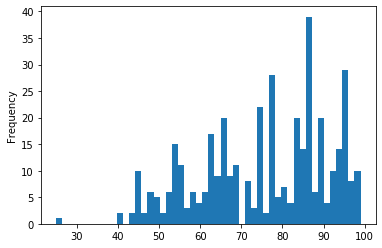

In [17]:
df['CLV_SCORE'].plot(kind='hist', bins=50)

In [18]:
plt.style.use('fivethirtyeight')

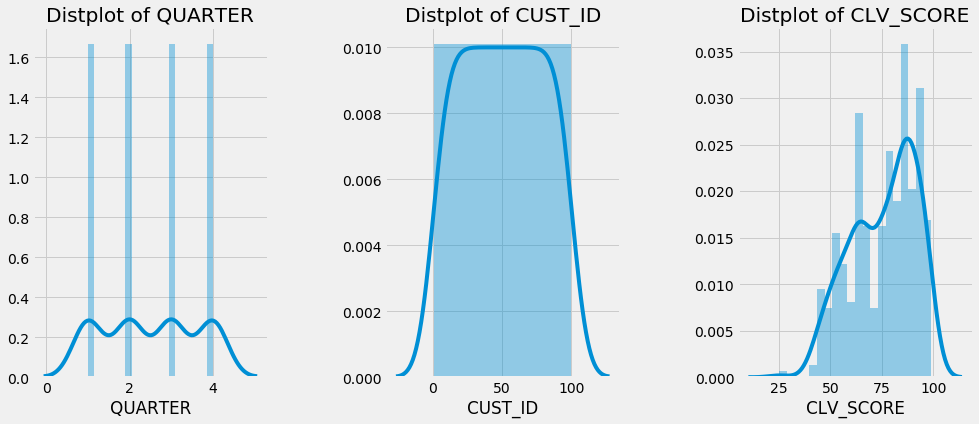

In [19]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['QUARTER' , 'CUST_ID' , 'CLV_SCORE']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [20]:
df.shift(1)

,QUARTER,CUST_ID,CLV_SCORE
0,NaN,NaN,NaN
1,1.0,1.0,89.0
2,2.0,1.0,99.0
3,3.0,1.0,91.0
4,4.0,1.0,93.0
...,...,...,...
395,3.0,99.0,89.0
396,4.0,99.0,86.0
397,1.0,100.0,63.0
398,2.0,100.0,72.0


In [21]:
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model

df_diff = df.diff(periods=1)


In [22]:
df_diff = df_diff[1:]
df_diff.head()

,QUARTER,CUST_ID,CLV_SCORE
1,1.0,0.0,10.0
2,1.0,0.0,-8.0
3,1.0,0.0,2.0
4,-3.0,1.0,-10.0
5,1.0,0.0,1.0


In [23]:
print(df['CUST_ID'].nunique())

100


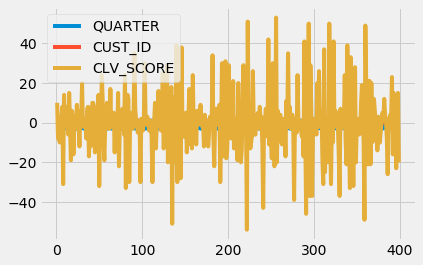

In [24]:
df_diff.plot()

In [25]:
X = df.values
train = X[0:27] # 27 data as train data
test = X[27:]  # 9 data as test data
predictions = []

In [26]:
train.size

81

In [27]:
pip install Lifetimes

Note: you may need to restart the kernel to use updated packages.


In [27]:
from lifetimes.plotting import *
from lifetimes.utils import *
#importing the necessary packages

In [1]:
from statsmodels.tsa.arima_model import ARIMA